# Konwolucja wielokanałowa w PyTorch

**Autor:** Mateusz Łopaciński

**Data:** 18.10.2025

Ten notebook przedstawia analizę konwolucji wielokanałowej.

In [ ]:
import torch 
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

print("Biblioteki zaimportowane pomyślnie!")
print(f"Wersja PyTorch: {torch.__version__}")
print(f"Wersja NumPy: {np.__version__}")

Biblioteki zaimportowane pomyślnie!
Wersja PyTorch: 2.9.0
Wersja NumPy: 2.2.6


## Konwolucja wielokanałowa

Tworzymy warstwę konwolucyjną z 1 kanałem wejściowym i 3 kanałami wyjściowymi.


In [ ]:
# Tworzenie warstwy konwolucyjnej z 3 kanałami wyjściowymi
conv1 = nn.Conv2d(in_channels=1, out_channels=3, kernel_size=3)
print("Warstwa konwolucyjna:", conv1)
print("Rozmiar wag:", conv1.state_dict()['weight'].shape)
print("Rozmiar bias:", conv1.state_dict()['bias'].shape)

Warstwa konwolucyjna: Conv2d(1, 3, kernel_size=(3, 3), stride=(1, 1))
Rozmiar wag: torch.Size([3, 1, 3, 3])
Rozmiar bias: torch.Size([3])


## Ustawienie filtrów Sobel

Filtry Sobel służą do wykrywania krawędzi:
- **Gx** - wykrywa pionowe krawędzie
- **Gy** - wykrywa poziome krawędzie
- **Trzeci filtr** - filtr jednostkowy (wszystkie jedynki)


In [ ]:
# Definicja filtrów Sobel
Gx = torch.tensor([[1.0,0,-1.0],[2.0,0,-2.0],[1.0,0.0,-1.0]])  # Wykrywa pionowe krawędzie
Gy = torch.tensor([[1.0,2.0,1.0],[0.0,0.0,0.0],[-1.0,-2.0,-1.0]])  # Wykrywa poziome krawędzie

# Ustawienie filtrów w warstwie
conv1.state_dict()['weight'][0][0] = Gx
conv1.state_dict()['weight'][1][0] = Gy
conv1.state_dict()['weight'][2][0] = torch.ones(3,3)  # Filtr jednostkowy

# Ustawienie bias na zero
conv1.state_dict()['bias'][:] = torch.tensor([0.0,0.0,0.0])

for i, filt in enumerate(conv1.state_dict()['weight']):
    print(f"Kanał {i}:")
    print(filt)
    print()

Kanał 0:
tensor([[[ 1.,  0., -1.],
         [ 2.,  0., -2.],
         [ 1.,  0., -1.]]])

Kanał 1:
tensor([[[ 1.,  2.,  1.],
         [ 0.,  0.,  0.],
         [-1., -2., -1.]]])

Kanał 2:
tensor([[[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]])



## Test z pionową linią

Tworzymy obraz testowy z pionową linią i sprawdzamy jak działają filtry.


Obraz wejściowy (pionowa linia):
tensor([[0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0.]])


Text(0.5, 1.0, 'Obraz wejściowy')

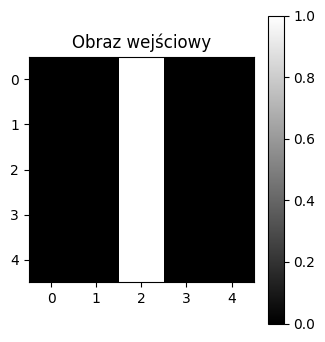

In [ ]:
# Tworzenie obrazu z pionową linią
image = torch.zeros(1, 1, 5, 5)
image[0, 0, :, 2] = 1  # Pionowa linia w środku
print('Obraz wejściowy (pionowa linia):')
print(image[0, 0, :, :])

# Wizualizacja obrazu wejściowego
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(image[0, 0, :, :].numpy(), interpolation='nearest', cmap=plt.cm.gray)
plt.colorbar()
plt.title('Obraz wejściowy')

3 mapy aktywacji:
tensor([[[[-4.,  0.,  4.],
          [-4.,  0.,  4.],
          [-4.,  0.,  4.]],

         [[ 0.,  0.,  0.],
          [ 0.,  0.,  0.],
          [ 0.,  0.,  0.]],

         [[ 3.,  3.,  3.],
          [ 3.,  3.,  3.],
          [ 3.,  3.,  3.]]]], grad_fn=<ConvolutionBackward0>)
Rozmiar wyniku: torch.Size([1, 3, 3, 3])
Kanał 0:
[[-4.  0.  4.]
 [-4.  0.  4.]
 [-4.  0.  4.]]

Kanał 1:
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]

Kanał 2:
[[3. 3. 3.]
 [3. 3. 3.]
 [3. 3. 3.]]



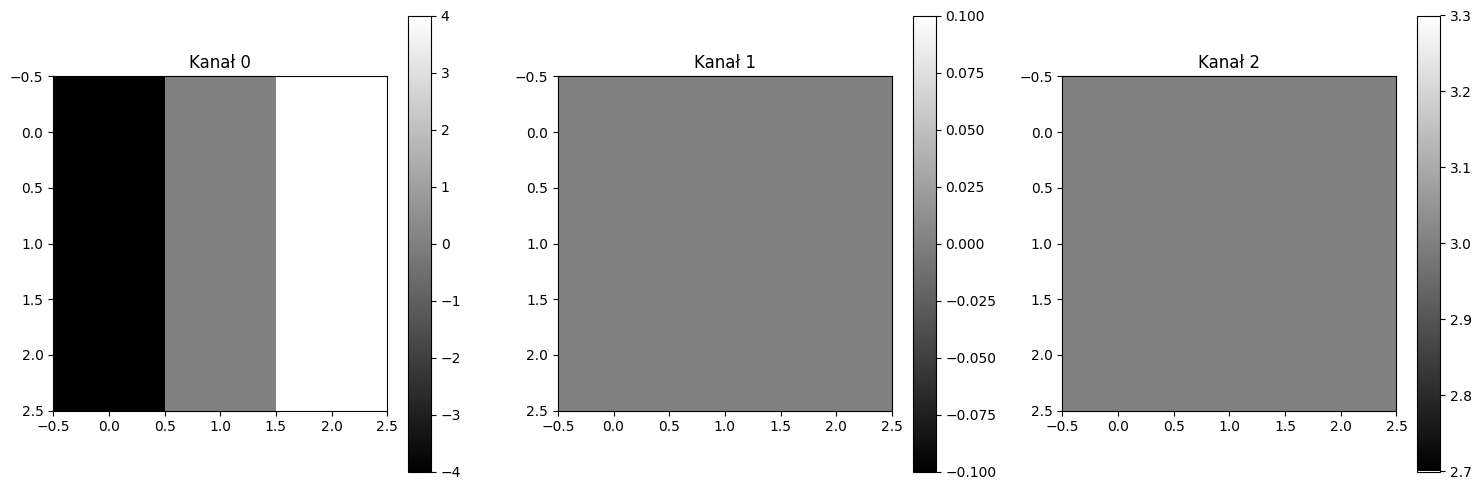

In [ ]:
# Wykonanie konwolucji
out = conv1(image)
print("3 mapy aktywacji:")
print(out)
print(f"Rozmiar wyniku: {out.shape}")

# Wizualizacja wyników
plt.figure(figsize=(15, 5))
for channel, img in enumerate(out[0]):
    plt.subplot(1, 3, channel + 1)
    plt.imshow(img.detach().numpy(), interpolation='nearest', cmap=plt.cm.gray)
    plt.colorbar()
    plt.title(f"Kanał {channel}")
    print(f"Kanał {channel}:")
    print(img.detach().numpy())
    print()
plt.tight_layout()

## Test z poziomą linią

Sprawdzamy jak filtry reagują na poziomą linię.


Obraz wejściowy (pozioma linia):
tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])


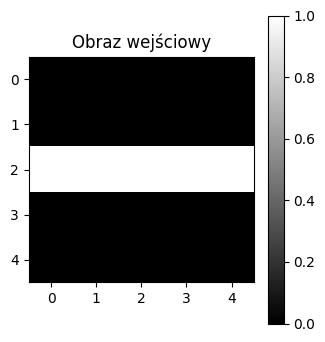

Wyniki dla poziomej linii:
Kanał 0:
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]

Kanał 1:
[[-4. -4. -4.]
 [ 0.  0.  0.]
 [ 4.  4.  4.]]

Kanał 2:
[[3. 3. 3.]
 [3. 3. 3.]
 [3. 3. 3.]]



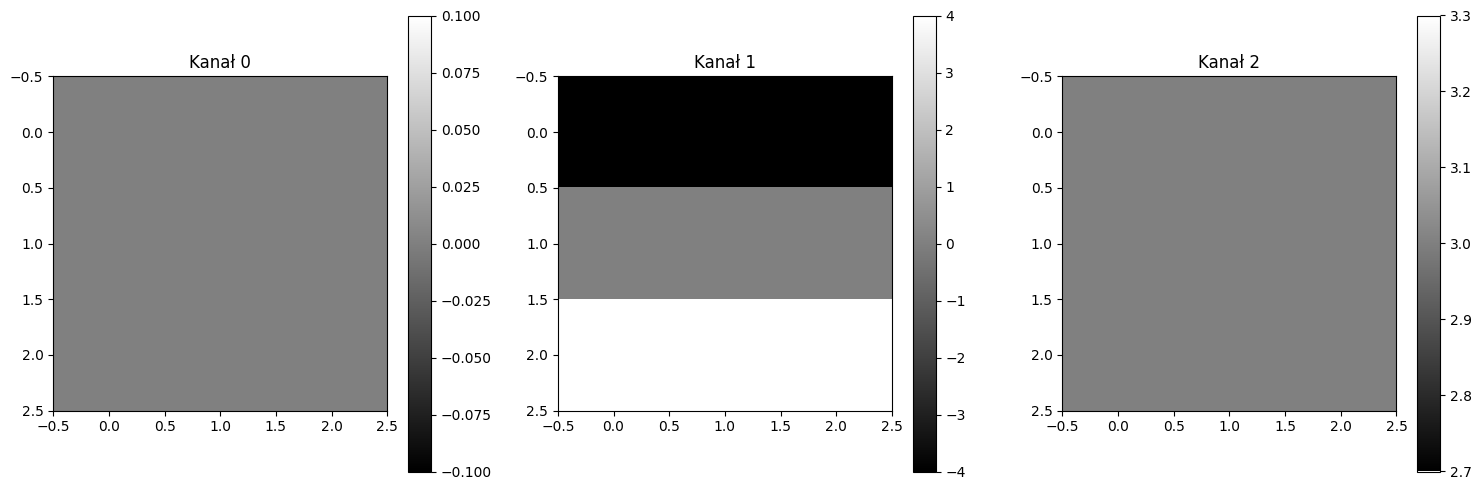

In [ ]:
# Tworzenie obrazu z poziomą linią
image1 = torch.zeros(1, 1, 5, 5)
image1[0, 0, 2, :] = 1  # Pozioma linia w środku
print('Obraz wejściowy (pozioma linia):')
print(image1[0, 0, :, :])

# Wizualizacja
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(image1[0, 0, :, :].detach().numpy(), interpolation='nearest', cmap=plt.cm.gray)
plt.colorbar()
plt.title('Obraz wejściowy')
plt.show()

# Wykonanie konwolucji
out1 = conv1(image1)
print("Wyniki dla poziomej linii:")

# Wizualizacja wyników
plt.figure(figsize=(15, 5))
for channel, img in enumerate(out1[0]):
    plt.subplot(1, 3, channel + 1)
    plt.imshow(img.detach().numpy(), interpolation='nearest', cmap=plt.cm.gray)
    plt.colorbar()
    plt.title(f"Kanał {channel}")
    print(f"Kanał {channel}:")
    print(img.detach().numpy())
    print()
plt.tight_layout()
plt.show()

## Konwolucja z wieloma kanałami wejściowymi

Teraz testujemy konwolucję z 2 kanałami wejściowymi i 1 kanałem wyjściowym.


Obraz wejściowy z 2 kanałami:
Kanał 0:
tensor([[ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.],
        [-2., -2., -2., -2., -2.],
        [ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.]])
Kanał 1:
tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])


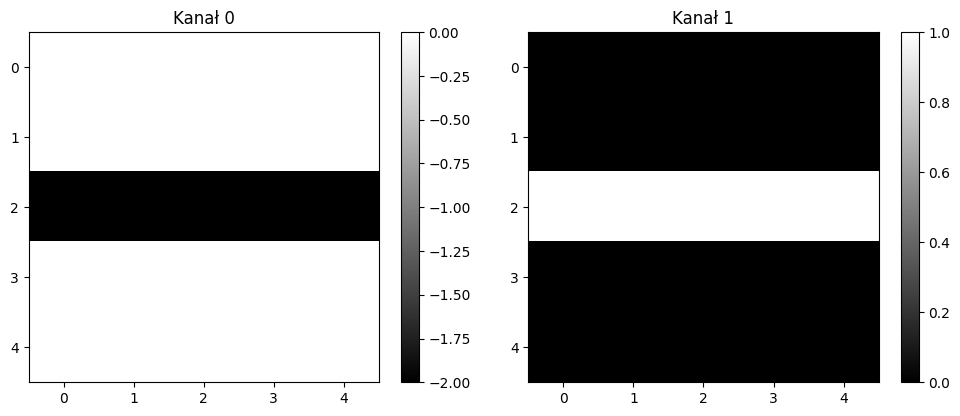

In [ ]:
# Tworzenie obrazu z 2 kanałami
image2 = torch.zeros(1, 2, 5, 5)
image2[0, 0, 2, :] = -2  # Pierwszy kanał: pozioma linia z wartością -2
image2[0, 1, 2, :] = 1   # Drugi kanał: pozioma linia z wartością 1
print('Obraz wejściowy z 2 kanałami:')
print("Kanał 0:")
print(image2[0, 0, :, :])
print("Kanał 1:")
print(image2[0, 1, :, :])

# Wizualizacja obu kanałów
plt.figure(figsize=(10, 4))
for channel, img in enumerate(image2[0]):
    plt.subplot(1, 2, channel + 1)
    plt.imshow(img.detach().numpy(), interpolation='nearest', cmap=plt.cm.gray)
    plt.colorbar()
    plt.title(f"Kanał {channel}")
plt.tight_layout()
plt.show()

In [ ]:
# Tworzenie warstwy konwolucyjnej z 2 kanałami wejściowymi i 1 wyjściowym
conv3 = nn.Conv2d(in_channels=2, out_channels=1, kernel_size=3)
print("Warstwa conv3:", conv3)
print("Rozmiar wag:", conv3.state_dict()['weight'].shape)

# Ustawienie wag
Gx1 = torch.tensor([[0.0,0.0,0.0],[0,1.0,0],[0.0,0.0,0.0]])  # Filtr jednostkowy
conv3.state_dict()['weight'][0][0] = 1 * Gx1   # Waga dla kanału 0
conv3.state_dict()['weight'][0][1] = -2 * Gx1  # Waga dla kanału 1
conv3.state_dict()['bias'][:] = torch.tensor([0.0])

print("Wagi ustawione:")
print("Kanał 0:", conv3.state_dict()['weight'][0][0])
print("Kanał 1:", conv3.state_dict()['weight'][0][1])

# Wykonanie konwolucji
result = conv3(image2)
print("Wynik konwolucji:")
print(result)
print("Rozmiar wyniku:", result.shape)

Warstwa conv3: Conv2d(2, 1, kernel_size=(3, 3), stride=(1, 1))
Rozmiar wag: torch.Size([1, 2, 3, 3])
Wagi ustawione:
Kanał 0: tensor([[0., 0., 0.],
        [0., 1., 0.],
        [0., 0., 0.]])
Kanał 1: tensor([[-0., -0., -0.],
        [-0., -2., -0.],
        [-0., -0., -0.]])
Wynik konwolucji:
tensor([[[[ 0.,  0.,  0.],
          [-4., -4., -4.],
          [ 0.,  0.,  0.]]]], grad_fn=<ConvolutionBackward0>)
Rozmiar wyniku: torch.Size([1, 1, 3, 3])


## Podsumowanie

Wykonano analizę konwolucji wielokanałowej w PyTorch:

### Główne wyniki:
- **Konwolucja wielokanałowa** pozwala na jednoczesne zastosowanie 3 różnych filtrów na tym samym obrazie
- **Filtr Sobel Gx** wykrywa pionowe krawędzie (silna odpowiedź na pionową linię, brak odpowiedzi na poziomą)
- **Filtr Sobel Gy** wykrywa poziome krawędzie (silna odpowiedź na poziomą linię, brak odpowiedzi na pionową)
- **Filtr identycznościowy** zachowuje średnią wartość w okolicy (stała odpowiedź na wszystkie struktury)

### Wnioski:
- Każdy filtr ma specyficzną funkcję: Gx dla pionowych krawędzi, Gy dla poziomych, identycznościowy dla zachowania średniej
- Jeden obraz wejściowy generuje 3 różne mapy aktywacji, każda pokazująca inną cechę obrazu
- Konwolucja wielokanałowa umożliwia równoczesne wykrywanie różnych typów cech w jednym przejściu
